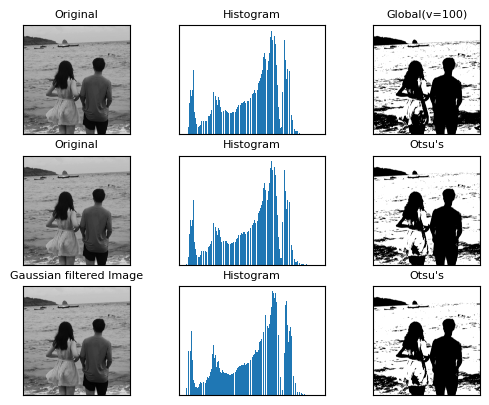

In [1]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg', 0)

# 固定阈值法
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Otsu阈值法
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 先进行高斯滤波，再使用Otsu阈值法
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 使用Matplotlib将原图，直方图，阈值图显示出来
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original', 'Histogram', 'Global(v=100)',
          'Original', 'Histogram', "Otsu's",
          'Gaussian filtered Image', 'Histogram', "Otsu's"]

for i in range(3):
    # 绘制原图
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3], fontsize=8)
    plt.xticks([]), plt.yticks([])

    # 绘制直方图 plt.hist, ravel 函数将数组降成一维
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1], fontsize=8)
    plt.xticks([]), plt.yticks([])

    # 绘制阈值图
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()